In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k_b=10
k_d=1
T_max = 25/k_d

In [3]:
q_b = 7
q_d = 2

# Dynamic Noise

In [5]:
def theor(t):
    r1 = k_b*q_b*(1-np.exp(-k_d*t))/(k_d*q_d)
    r2 = k_b*q_b*(np.exp(-k_d*t)-np.exp(-q_d*t))/((k_d-q_d)*q_d)
    return(r1+r2)

In [7]:
dt = .1;
nreps = 1000
tau = 1/k_d
mu = np.zeros(int(T_max/dt))
sq = np.zeros(int(T_max/dt))

for rep in range(nreps):
    i=0
    x=0
    t=0
    q = 0
              
    while t<T_max:
        r1,r2=np.random.rand(1,2).flatten().tolist()
        p1 = q_b
        p2 = q_d*q
        p3 = k_b*q
        p4 = k_d*x
        p_net = p1+p2+p3+p4

        t_react = -np.log(r1)/p_net
        t=t+t_react
        
        while i<np.min([int(t/dt),int(T_max/dt)]):
            if i%int(tau)==0:
                mu[i] = mu[i]+x
                sq[i] = sq[i]+x**2
            i=i+1
              
        if r2<p1/p_net:
            q=q+1
            
        elif r2<(p1+p2)/p_net:
            q=q-1
            
        elif r2<(p1+p2+p3)/p_net:
            x=x+1
            
        else:
            x=x-1
    
mu = np.array(mu)/nreps
sigma = np.array(sq)/nreps - mu**2

In [12]:
def var(t):
    t = t*dt
    return((35/3)*np.exp(-3*t)*(-40+33*np.exp(t)-6*np.exp(2*t)+13*np.exp(3*t)-60*t*np.exp(t)))

In [15]:
mu = mu[:100]
sigma = sigma[:100]

Text(0.5, 1.0, 'Dynamic')

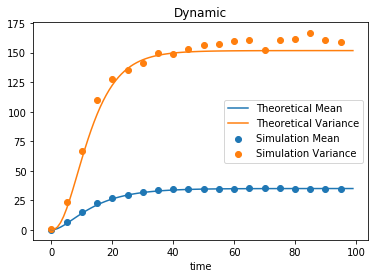

In [18]:
plt.scatter(np.arange(0,len(mu[::5]))*5,mu[::5],label="Simulation Mean")
plt.scatter(np.arange(0,len(sigma[::5]))*5,sigma[::5],label="Simulation Variance")
plt.plot([theor(.1*t) for t in range(100)],label='Theoretical Mean')
plt.plot([var(t) for t in range(100)],label='Theoretical Variance')
plt.xlabel('time')
plt.legend()
plt.title("Dynamic")

# Static Noise

In [19]:
dt = .1;
nreps = 1000
tau = 1/k_d
mu = np.zeros(int(T_max/dt))
sq = np.zeros(int(T_max/dt))

for rep in range(nreps):
    i=0
    x=0
    t=0
    q = np.random.poisson(q_b/q_d)
    if q==0:
        continue
              
    while t<T_max:
        [r1,r2]=np.random.rand(2)
        p1 = k_b*q
        p2 = k_d*x
        p_net = p1+p2

        t_react = -np.log(r1)/p_net
        t=t+t_react
        
        while i<np.min([int(t/dt),int(T_max/dt)]):
            mu[i] = mu[i]+x
            sq[i] = sq[i]+x**2
            i=i+1
              
        if r2<p1/p_net:
            x=x+1
            
        else:
            x=x-1
    
mu = np.array(mu)/nreps
sigma = np.array(sq)/nreps - mu**2

In [25]:
def var(t):
    t = t*dt
    return()

In [29]:
sigma = sigma[:100]
mu = mu[:100]

Text(0.5, 1.0, 'Static')

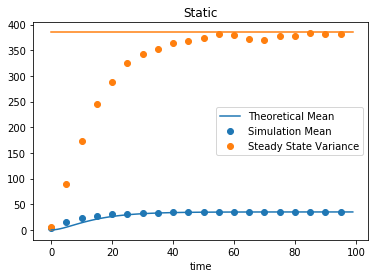

In [32]:
plt.scatter(np.arange(0,len(mu[::5]))*5,mu[::5],label="Simulation Mean")
plt.scatter(np.arange(0,len(sigma[::5]))*5,sigma[::5],label="Steady State Variance")
plt.plot([theor(.1*t) for t in range(100)],label='Theoretical Mean')
plt.plot(np.repeat(385,100))
plt.xlabel('time')
plt.legend()
plt.title("Static")